# IAU project 1

## Matej Ševčík, Vladyslav Chesnykov (50%, 50%)

    Matej Ševčík: Pair analysis of data, EDA with visualisation, first hypotesis.

    Vladyslav Chesnykov: Problem identification and partial correction, second hypotesis.

# Loading data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import pearsonr
from numpy import cov

In [3]:
user = pd.read_csv("dataset_iau/user.csv", sep='\t')
session = pd.read_csv("dataset_iau/session.csv", sep='\t')
product = pd.read_csv("dataset_iau/product.csv", sep='\t')

In [4]:
product.head()

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila


In [5]:
user.head()

,residence,sex,username,user_id,address,birthdate,race,job,name,current_location,mail
0,NaN,F,vigorellimatilda,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",1917-03-25,NaN,NaN,Gemma Baracca,NaN,cesarecagnotto@tim.it
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,matsumotoasuka,298,三重県西東京市上広谷3丁目27番1号,NaN,NaN,演歌歌手,近藤 翼,"(Decimal('44.4329015'), Decimal('-94.188145'))",nakajimaatsushi@yahoo.com
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,debra19,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868",1985-05-21,white,Tourism officer,Belinda Harvey,"(Decimal('17.674891'), Decimal('43.063751'))",kevindeleon@yahoo.com
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,udineseimelda,2538,NaN,2012-01-02,asian,NaN,Sig.ra Susanna Roero,"(Decimal('-65.4578585'), Decimal('-162.734373'))",federicacaccioppoli@tele2.it
4,NaN,NaN,debra72,590,USCGC Kim\r\nFPO AA 25581,NaN,white,NaN,Deborah Larson,"(Decimal('-67.907028'), Decimal('-104.061594'))",stevendavis@yahoo.com


In [6]:
session.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937


# ANALYSIS OF DATA STRUCTURE

We are working with the dataset 70. It contains 3 files: product.csv, session.csv, user.csv (csv - comma-separated values).

### FILE product.csv

The file associates products with the stores that sell them and lists the locations of those stores. It is 613 KB long and contains 4 columns.

In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14958 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14958 non-null  int64 
 1   code         14941 non-null  object
 2   store_name   14958 non-null  object
 3   location     14958 non-null  object
dtypes: int64(1), object(3)
memory usage: 467.6+ KB


### FILE user.csv

The file provides details of the users observed, such as their permanent residence, gender, date of birth, occupation. It is 446 KB and contains 11 columns.)

In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   residence         890 non-null    object
 1   sex               1271 non-null   object
 2   username          2542 non-null   object
 3   user_id           2542 non-null   int64 
 4   address           2161 non-null   object
 5   birthdate         1398 non-null   object
 6   race              763 non-null    object
 7   job               1017 non-null   object
 8   name              2542 non-null   object
 9   current_location  2415 non-null   object
 10  mail              2542 non-null   object
dtypes: int64(1), object(10)
memory usage: 218.6+ KB


### FILE session.csv

The file contains details of individual user sessions. It provides various details, in particular information on whether the session ended with a product purchase (ack), the identifier of the user who attended the session (user_id) and the identifier of the product (product_ean) that was involved. In addition, it also describes, for example, the length of the session, the screen size of the device or the speed of the user's mouse movement. It is 2.26 MB and contains 25 columns.

In [9]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

# IDENTIFING PROBLEMS IN DATA (WITH PARTIAL SOLUTION)

## FIRST SEEN:

***In the provided date consisting of three datasets, we can find problems of the following types:***

   **USER**
    
   1. From the output of the first rows of the **user table**, we can see that some rows are written in **hieroglyphs**. (we have 2 options for dealing with this problem: either write a function that can translate from hieroglyphs to Latin symbols, or if their number is NOT significant - **delete it**, if significant - one of the **options for dealing with NaN**)
        
        
   2. **Unstructured data** in some fields, such as address or residence. In some of them there are postal codes, in random places. (Are these indexes necessary at all? How will they affect data analysis? I think that it will be possible to write an additional function that will **correct the unstructuredness**, **remove additional characters**, such as, for example: numbers, tabs, newline characters. Perhaps the address can be simplified to the simplier form (cities).) I think that this problem needs a more difficult solution, so we will solve it in the **second phase of the project**.
   
   
    
   3. In the field **job** using the unique method, you can see that the job attributes **is too long** what is unnecessary for analysis. I think that it will be possible **to write a function** that standardizes all works **to a more readable form**.
    
    
   4. In the **current_location** field, you can see a type of data that is not convenient for analysis **(Decimal('44.4329015'), Decimal('-94.188145'))**. I think that this problem needs a more difficult solution, so we will solve it in the **second phase of the project**.
    
    
   5. etc.
    
   **PRODUCT**
   
   1. The **location** field can be divided into a more convenient view, that is, **into 2 columns, country and city**.
    
   2. etc.
    
   **SESSION**
   
   1. In the dataset MAYBE there are a lot of **unnecessary fields** that will not be triggered in the analysis, that do not represent analytical value. For example, what exhibits can we make from information about the user's extension? (Let's just remove some, in our opinion, redundant information from the dataset)
    
   2. etc.
   
   **ETC.**
   
       Almost all datasets have outliers + duplicates + missing data. We will deal with this situationally in most cases. In particular, we will delete only rows with a too large percentage of missing data, because these rows do not represent analytical value for us.
       
   **ADDITIONAL NOTES**
   
        The goal is also to output one continuous dataset by connecting fields (product_ean, user_id). This will provide us with a faster and, accordingly, more practical access to data. Except for some exceptional cases where we will probably need to use split datasets.

## USER CORRECTING

### USEFULLNESS OF FIELDS

- Fields **race, username and mail** are **NOT analyticly valuable**. So that we can delete them.

- **residence vs. address vs. current_location**?? Do we need all of them??

     

- We can check exactly which **coordinates** are presented in the field of **current_location**, accordingly in some variants we will get values that refer us to the middle of the ocean, which leads us to the **conclusion about the randomness** of some data. Accordingly, it is not yet known how exactly we should use this attribute.

  **Example:** 
  
           (Decimal('-67.907028'), Decimal('-104.061594')) - 67°54'25.3"S 104°03'41.7"W (Pacific Ocean)
  
           (Decimal('-85.641904'), Decimal('-53.404531')) - 85°38'30.9"S 53°24'16.3"W (Antarctic Ice shield)
           
           (Decimal('85.034897'), Decimal('164.620498')) - 85°02'05.6"N 164°37'13.8"E (Arctic Ocean)

- Can use name for **predicting sex** (using it as ack)?? For example, if we shall get **from name** last char, and it appears to be 'a', and if sex="NaN", then we change it to F. (just theory)


In [10]:
user = user.drop(columns=['race', 'username', 'mail', 'name', 'job'], axis=1)
user

,residence,sex,user_id,address,birthdate,current_location
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",1917-03-25,NaN
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,NaN,"(Decimal('44.4329015'), Decimal('-94.188145'))"
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868",1985-05-21,"(Decimal('17.674891'), Decimal('43.063751'))"
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,2012-01-02,"(Decimal('-65.4578585'), Decimal('-162.734373'))"
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,NaN,"(Decimal('-67.907028'), Decimal('-104.061594'))"
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\r\n487 16 Vysoké nad Jizerou,NaN,"(Decimal('6.326596'), Decimal('50.261770'))"
2538,NaN,F,1783,Bachmanngasse 96\r\n15562 Pasewalk,NaN,"(Decimal('-20.2418925'), Decimal('-42.286118'))"
2539,"Canale Maria, 73\r\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\r\n21030, Cugliate (VA)",NaN,"(Decimal('-85.641904'), Decimal('-53.404531'))"
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\r\nVila Da Paz\...",1954-07-03,"(Decimal('-51.687864'), Decimal('135.289800'))"


In [11]:
from datetime import datetime
user['birthdate'] = pd.to_datetime(user['birthdate'])
today = datetime(2023, 10, 29)
user['age'] = today - user['birthdate']
user['age'] = user['age'] // pd.Timedelta(days=365.25)
user = user.drop('birthdate', axis=1)
#user['age'].fillna(-1, inplace=True)
#user['age'] = user['age'].astype(int)
#user = user.replace(-1, np.nan)
user

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\r\n487 16 Vysoké nad Jizerou,"(Decimal('6.326596'), Decimal('50.261770'))",NaN
2538,NaN,F,1783,Bachmanngasse 96\r\n15562 Pasewalk,"(Decimal('-20.2418925'), Decimal('-42.286118'))",NaN
2539,"Canale Maria, 73\r\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\r\n21030, Cugliate (VA)","(Decimal('-85.641904'), Decimal('-53.404531'))",NaN
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\r\nVila Da Paz\...","(Decimal('-51.687864'), Decimal('135.289800'))",69.0


### OUTLAYER PROBLEMS

*Main outlayer problem in user dataset is **hieroglyphs' form of some attributes**. So that we can check its count form **.unique() method**. Let's write the method for **checking percentage** of hieroglyph symbols in each column.*

In [12]:
import re

def get_percent_of_hieroglyphs(col):
    uniq = user[col].unique()
    not_hieroh = []
    pattern = r"^[a-zA-Z0-9]+"
    for text in uniq:
        if isinstance(text, str) and re.match(pattern, text):
            not_hieroh.append(text)
    print(f"Count of NOT hieroglyph: {len(not_hieroh)}")
    print(f"Count of all unique: {len(uniq)}")
    print(f"Percent of hieroglyphs in {col}: {100 - (len(not_hieroh)/len(uniq) * 100)}%")

get_percent_of_hieroglyphs("residence")
get_percent_of_hieroglyphs("address")

Count of NOT hieroglyph: 737
Count of all unique: 891
Percent of hieroglyphs in residence: 17.28395061728395%
Count of NOT hieroglyph: 1749
Count of all unique: 2162
Percent of hieroglyphs in address: 19.102682701202582%


In [13]:
# from decimal import Decimal

# def convert_to_dms(coordinate, is_latitude):
#     try:
#         decimal_coordinate = Decimal(coordinate)
#         degrees = int(abs(decimal_coordinate))
#         minutes = int((abs(decimal_coordinate) - degrees) * 60)
#         seconds = (abs(decimal_coordinate) - degrees - minutes / 60) * 3600

#         if is_latitude:
#             direction = "N" if decimal_coordinate >= 0 else "S"
#         else:
#             direction = "E" if decimal_coordinate >= 0 else "W"

#         formatted_value = f"{degrees}°{minutes}'{seconds:.1f}\"{direction}"
#         return formatted_value
#     except ValueError:
#         return np.nan

# user['current_location'] = user['current_location'].apply(lambda x: convert_decimal_to_dms(x, is_latitude=True))

    Here I tried to solve the problem with addresses, the problem is that the address field is totally unstructured and is cobbled together from the most heterogeneous data possible. First of all, I think we have to create a language model that can recognize the structure of the address and extract the data we need from it. Namely, to extract the user's city or country. Then there is the problem of dealing with hieroglyphics, and the only thing that comes to mind is trying to translate them, because using my own function I was able to see how many of them there are in the address column and found that there are as many as 20 percent of them, which is too much to remove. And the last nuance is that we need to somehow translate the coordinates of the current location into the place itself, namely its name.

*We have too much words in job attributes, that's why we should **simplifize some of jobs to one word**, if we could, for this we will write a **method:***

### DUPLICATES PROBLEMS

In [14]:
duplicates_count = user.apply(lambda x: x.duplicated().sum())
duplicates_count

residence           1651
sex                 2539
user_id              936
address              380
current_location     126
age                 2424
dtype: int64

In [15]:
user = user.drop_duplicates(keep='first')
user

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\r\n487 16 Vysoké nad Jizerou,"(Decimal('6.326596'), Decimal('50.261770'))",NaN
2538,NaN,F,1783,Bachmanngasse 96\r\n15562 Pasewalk,"(Decimal('-20.2418925'), Decimal('-42.286118'))",NaN
2539,"Canale Maria, 73\r\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\r\n21030, Cugliate (VA)","(Decimal('-85.641904'), Decimal('-53.404531'))",NaN
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\r\nVila Da Paz\...","(Decimal('-51.687864'), Decimal('135.289800'))",69.0


In [16]:
count_of_user_dup = user['user_id'].duplicated().sum()
print(f"Count of user duplicates: {count_of_user_dup}")

Count of user duplicates: 936


In [17]:
# duplicates = user[user['user_id'].duplicated(keep=False)]
# duplicates 
duplicates_count = user['user_id'].value_counts()
duplicates_count_df = duplicates_count.reset_index()
duplicates_count_df.columns = ['user_id', 'count_of_duplicates']
duplicates_count_df


,user_id,count_of_duplicates
0,368,6
1,961,6
2,1023,5
3,2057,5
4,1702,5
...,...,...
1601,175,1
1602,2129,1
1603,12,1
1604,1963,1


*We have a problem with the fact that there may be duplicates in the user_id attribute denoting a unique user profile, which, accordingly, creates competition in claiming a profile for a session in the corresponding user_id attribute. This has the following consequences: our dataset will conflict in determining the correspondence between sessions and users. Accordingly, the conclusion is suggested that we should delete all duplicate user_idishniki. (this issue needs updates and will be resolved in the next phases)*

In [18]:
#user.info()

### NAN PROBLEMS

In [19]:
nan_user_counts = user.isna().sum()
nan_user_counts

residence           1652
sex                 1271
user_id                0
address              381
current_location     127
age                 1144
dtype: int64

***With the help of the | user.dropna(thresh=3) | command, we can delete all rows that have more than 3 NaN values. This will quickly search for lines that are not needed for research.***

In [20]:
user = user.dropna(thresh=3)
user

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\r\n487 16 Vysoké nad Jizerou,"(Decimal('6.326596'), Decimal('50.261770'))",NaN
2538,NaN,F,1783,Bachmanngasse 96\r\n15562 Pasewalk,"(Decimal('-20.2418925'), Decimal('-42.286118'))",NaN
2539,"Canale Maria, 73\r\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\r\n21030, Cugliate (VA)","(Decimal('-85.641904'), Decimal('-53.404531'))",NaN
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\r\nVila Da Paz\...","(Decimal('-51.687864'), Decimal('135.289800'))",69.0


## SESSION ANALYZING

In [21]:
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,9.85009,2.90130,5.35139,2022-05-28 00:56:48,1424279,0.0,1920,5.59338,firefox,9.67918,...,47.14750,NaN,463,lower,1.62560,5.15106,5854850554306,60.29421,50.56457,10.57640
11085,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,1280,5.16977,mobile,8.28987,...,39.86244,5.79656,445,768,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923
11086,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,1024,11.54376,mobile,11.46814,...,35.09946,7.35456,1688,768,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022
11087,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,1920,4.38175,chrome,9.94778,...,57.69495,8.65941,755,800,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471


### USEFULLNESS OF FIELDS

**ALL OF THEM CAN BE USED IN PERSPECTIVES OF ANALYSIS**


**Interaction during the session:**

***page_activity_duration = duration of user activity on the page***

wild_mouse_duration = duration of rapid mouse movement

***mouse_move_total_rel_distance = normalized to screen height and width***

***scroll_move_total_rel_distance = normalized to screen height and width***
     
**(pct_) ratio of the number of interactions of a given type to the total number multiplied by the base value:**

pct_scroll_move_duration = normonovaná value for the total time of scrolling

pct_mouse_move = mouse movement records

pct_scroll_move = roll records

pct_wild_mouse = records of rapid mouse movement

***pct_click = records of user clicks***

***pct_double_click = records of a user's double click***

pct_rage_click = records of violent clicks on the page

pct_input = records of user input

pct_scrandom = records of fast pressing on the page

pct_click_product_info = product information click records

In [22]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

In [23]:
# session['screen_resolution'] = session['screen_width'].astype(str) + ' x ' + session['screen_height'].astype(str)
# session = session.drop(columns=['screen_width', 'screen_height'], axis=1)
# session

### NAN PROBLEMS

In [24]:
nan_session_counts = session.isna().sum()
nan_session_counts

pct_mouse_click                   11
total_load_time                    0
mouse_move_total_rel_distance     11
session_start                      0
session_id                         0
ack                                0
screen_width                       0
pct_click                         11
browser_name                       0
pct_mouse_move                    11
pct_click_product_info            11
pct_scroll_move_duration          11
pct_scrandom                      11
session_duration                   0
page_activity_duration            11
pct_rage_click                    11
scroll_move_total_rel_distance    11
user_id                            0
screen_height                      0
pct_input                         11
pct_doubleclick                   11
product_ean                        0
pct_scroll_move                   12
pct_wild_mouse                    11
wild_mouse_duration               11
dtype: int64

### OUTLAYER PROBLEMS

*Let's try to analyze the attributes that are important to us. By drawing graphs and gradually identifying either anomalies or outliers, we will clean up our datasets.*

***I will analyse the attributes from first part of this phase.***

In [25]:
counter_of_dropped_data = 0
session_size = 0

def drop_outliers_performance(column_name, most_left, most_right):
    global session
    global session_size
    global counter_of_dropped_data
    sns.histplot(session[column_name], kde=True)
    all_count = (session[column_name]).sum()
#   count_before_replace_with_nan = (session[column_name].isna()).sum()
#   session.loc[session[column_name] < most_left, column_name] = np.nan
#   session.loc[session[column_name] > most_right, column_name] = np.nan\
    original_count = len(session)
    mask = (session[column_name] > most_left) & (session[column_name] < most_right)
    session = session[mask]
    session.reset_index(drop=True, inplace=True)
    dropped_count = original_count - len(session)
    counter_of_dropped_data += dropped_count
    session_size += all_count
#   count_after_replace_with_nan = (session[column_name].isna()).sum()
#   dropped_count = count_after_replace_with_nan - count_before_replace_with_nan
    print(f"Count replaced with NaN: {(dropped_count / all_count) * 100:.10f}%.")
    sns.histplot(session[column_name], kde=True)

#### SESSION_DURATION

If percent of replaced ones less than **0.05%**, then it won't be matter.

Count replaced with NaN: 0.0086792219%.


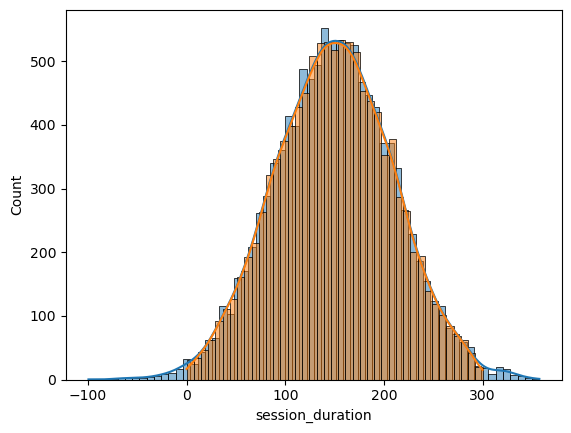

In [26]:
drop_outliers_performance('session_duration', 0, 300)

It follows from the data that the user spent a **negative time in the session**, which is essentially nonsense. Since it is not yet known reliably how to fight outliers, I will **temporarily** correct this error by **entering in the place of unreliable data NaN**.

#### PCT_DOUBLECLICK

Count replaced with NaN: 0.0409356689%.


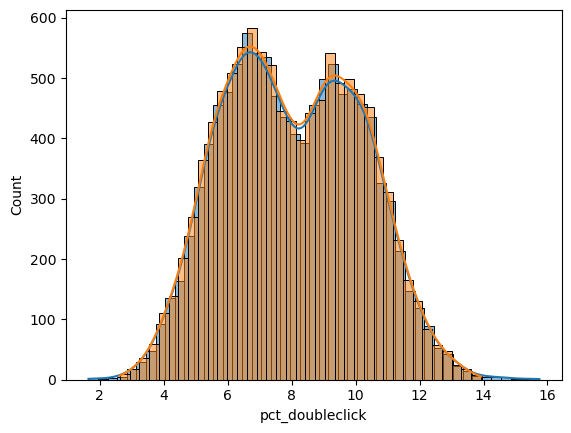

In [27]:
drop_outliers_performance('pct_doubleclick', 2.5, 14)

#### SCROLL_MOVE_TOTAL_REL_DISTANCE

Count replaced with NaN: 0.0265513045%.


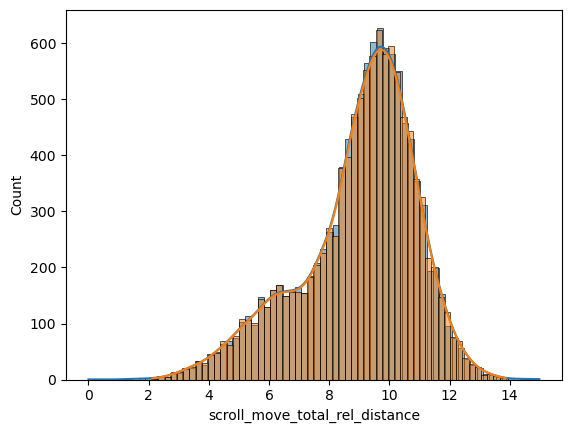

In [28]:
drop_outliers_performance('scroll_move_total_rel_distance', 2, 14)

#### PCT_CLICK

Count replaced with NaN: 0.0314842733%.


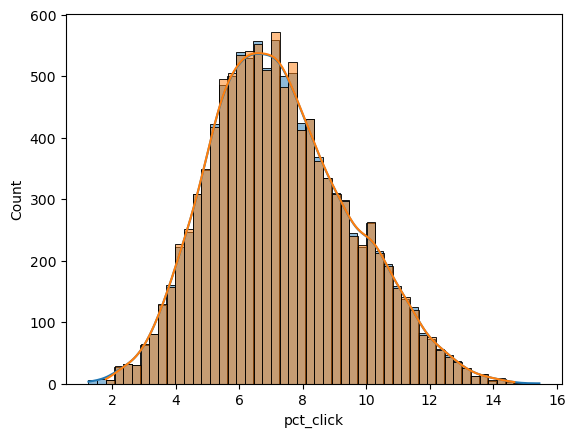

In [29]:
drop_outliers_performance('pct_click', 1.8, 14.8)

#### MOUSE_MOVE_TOTAL_REL_DISTANCE

Count replaced with NaN: 0.0354751368%.


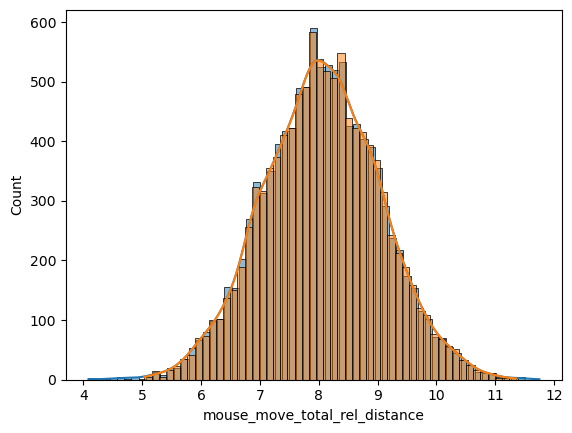

In [30]:
drop_outliers_performance('mouse_move_total_rel_distance', 5, 11.4)

#### PCT_MOUSE_CLICK

Count replaced with NaN: 0.0251765476%.


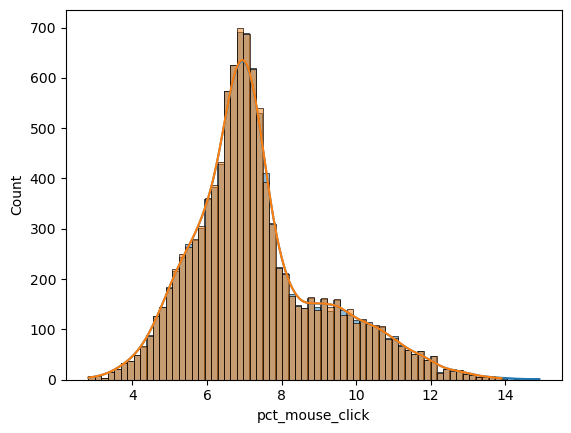

In [31]:
drop_outliers_performance('pct_mouse_click', 2.5, 14)

#### PAGE_ACTIVITY_DURATION

Count replaced with NaN: 0.0157408636%.


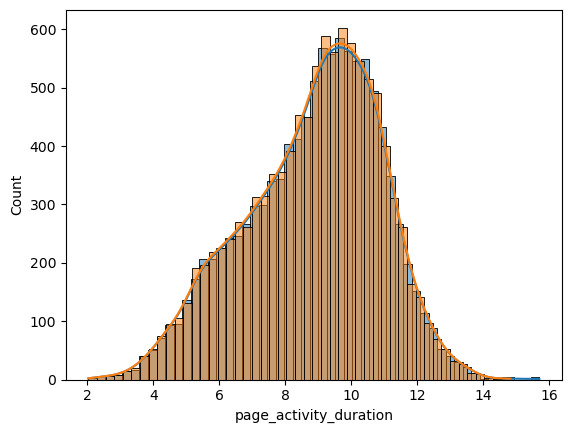

In [32]:
drop_outliers_performance('page_activity_duration', 2, 15)

#### BROWSER_NAME

<Axes: xlabel='browser_name', ylabel='Count'>

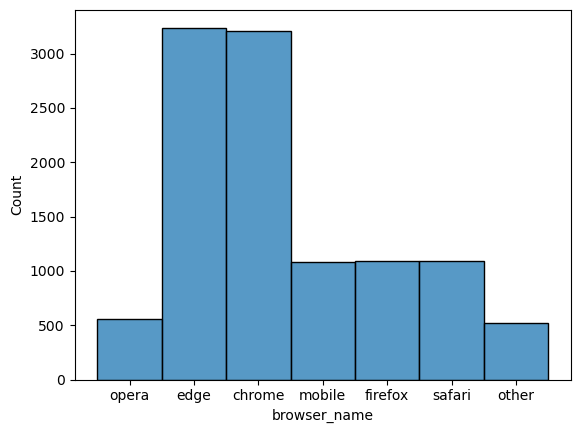

In [33]:
sns.histplot(session['browser_name'], kde=False)

### CONCLUSION IN OUTLAYER CORRECTION

Our goal was to partially clean up the dataset, so we did just that. In total, we cleaned the following number of rows:

In [34]:
print(f"Count of dropped: {counter_of_dropped_data}.\n Percentage: {counter_of_dropped_data / session_size * 100:.4f}%")
session

Count of dropped: 297.
 Percentage: 0.0136%


,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
2,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
3,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937
4,6.10629,1.60295,8.34195,2019-12-26 10:34:30,1119598,0.0,1024,7.92838,edge,7.76429,...,55.01870,11.45785,16,higher,0.88883,10.05772,8377930285275,62.92456,57.14864,9.85068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10787,8.90701,3.24156,8.19275,2021-07-17 19:12:18,891391,1.0,1366,8.86332,safari,9.86641,...,49.90961,10.34860,681,higher,0.08068,9.30304,2632912096956,47.04046,79.22789,5.91648
10788,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,1280,5.16977,mobile,8.28987,...,39.86244,5.79656,445,768,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923
10789,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,1024,11.54376,mobile,11.46814,...,35.09946,7.35456,1688,768,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022
10790,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,1920,4.38175,chrome,9.94778,...,57.69495,8.65941,755,800,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471


### DUPLICATES PROBLEMS

In [35]:
duplicates_session_count = session.apply(lambda x: x.duplicated().sum())
#duplicates_session_count

In [36]:
session = session.drop_duplicates(keep='first')
#session

### RESULT :

In [37]:
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
2,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
3,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937
4,6.10629,1.60295,8.34195,2019-12-26 10:34:30,1119598,0.0,1024,7.92838,edge,7.76429,...,55.01870,11.45785,16,higher,0.88883,10.05772,8377930285275,62.92456,57.14864,9.85068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,7.51957,3.00637,7.02760,2022-04-17 11:26:23,424834,1.0,higher,8.77933,edge,10.04616,...,31.46144,9.95534,2206,1080,0.76442,5.51938,9072355322039,41.86458,70.24703,9.79886
10787,8.90701,3.24156,8.19275,2021-07-17 19:12:18,891391,1.0,1366,8.86332,safari,9.86641,...,49.90961,10.34860,681,higher,0.08068,9.30304,2632912096956,47.04046,79.22789,5.91648
10789,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,1024,11.54376,mobile,11.46814,...,35.09946,7.35456,1688,768,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022
10790,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,1920,4.38175,chrome,9.94778,...,57.69495,8.65941,755,800,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471


## PRODUCT ALALYSING

In [38]:
product

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila
...,...,...,...,...
14953,6077115675137,US,Fairview Heights,America/Chicago
14954,8549791867352,DE,Ehingen,Europe/Berlin
14955,8931618033734,RU,Tyoply Stan,Europe/Moscow
14956,3259372694448,RU,Mikhaylovka,Europe/Volgograd


In [39]:
product[['region', 'city']] = product['location'].str.split('/', n=1, expand=True)
product = product.drop(['store_name', 'location'], axis=1)
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


### NAN PROBLEMS

In [40]:
product.isna().sum()

product_ean     0
code           17
region          0
city            0
dtype: int64

In [41]:
product = product.dropna()
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


### OUTLAYER PROBLEMS

### DUPLICATES PROBLEMS

In [42]:
product = product.drop_duplicates(keep='first')

In [43]:
product['product_ean'].duplicated().sum()

0

In [44]:
product['region'].duplicated().sum()
uniq_reg = product['region'].unique()
uniq_reg

array(['America', 'Asia', 'Europe', 'Africa', 'Australia', 'Pacific',
       'Atlantic', 'Indian'], dtype=object)

In [45]:
matching_rows = product[product['region'] == 'Pacific']
matching_rows

,product_ean,code,region,city
35,1920866758589,NZ,Pacific,Auckland
155,6059445329478,US,Pacific,Honolulu
233,3614297309547,PG,Pacific,Port_Moresby
326,7737036803567,PG,Pacific,Port_Moresby
472,4172859785264,NZ,Pacific,Auckland
...,...,...,...,...
14289,8301916139047,NZ,Pacific,Auckland
14404,6407588828219,PG,Pacific,Port_Moresby
14427,4981889226957,PG,Pacific,Port_Moresby
14512,4617494512528,US,Pacific,Honolulu


<Axes: xlabel='region', ylabel='Count'>

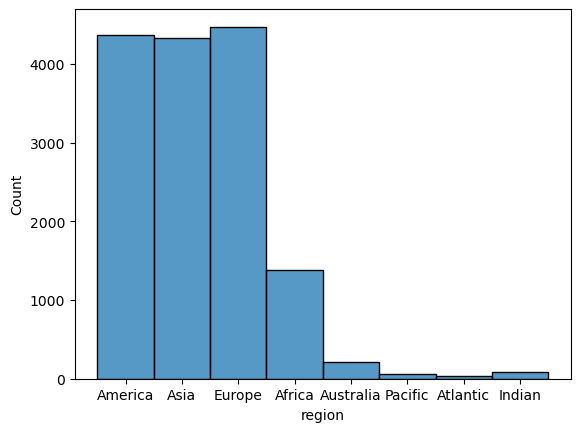

In [46]:
sns.histplot(product['region'])

In [47]:
def check_count_of_region_attr(region):
    attribute_counts = product['region'].value_counts()
    count_of_defined_attribute = attribute_counts.get(region, 0)
    return f"{region}: {count_of_defined_attribute} times."

for region in uniq_reg:
    print(check_count_of_region_attr(region))

America: 4373 times.
Asia: 4329 times.
Europe: 4474 times.
Africa: 1376 times.
Australia: 210 times.
Pacific: 61 times.
Atlantic: 38 times.
Indian: 80 times.


### RESULT :

In [48]:
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


## CONCLUSION. WHAT WAS CHANGED?

In [49]:
user_start = pd.read_csv("dataset_iau/user.csv", sep='\t')
session_start = pd.read_csv("dataset_iau/session.csv", sep='\t')
product_start = pd.read_csv("dataset_iau/product.csv", sep='\t')

In [50]:
user_start.head()

,residence,sex,username,user_id,address,birthdate,race,job,name,current_location,mail
0,NaN,F,vigorellimatilda,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",1917-03-25,NaN,NaN,Gemma Baracca,NaN,cesarecagnotto@tim.it
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,matsumotoasuka,298,三重県西東京市上広谷3丁目27番1号,NaN,NaN,演歌歌手,近藤 翼,"(Decimal('44.4329015'), Decimal('-94.188145'))",nakajimaatsushi@yahoo.com
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,debra19,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868",1985-05-21,white,Tourism officer,Belinda Harvey,"(Decimal('17.674891'), Decimal('43.063751'))",kevindeleon@yahoo.com
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,udineseimelda,2538,NaN,2012-01-02,asian,NaN,Sig.ra Susanna Roero,"(Decimal('-65.4578585'), Decimal('-162.734373'))",federicacaccioppoli@tele2.it
4,NaN,NaN,debra72,590,USCGC Kim\r\nFPO AA 25581,NaN,white,NaN,Deborah Larson,"(Decimal('-67.907028'), Decimal('-104.061594'))",stevendavis@yahoo.com


In [51]:
user_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   residence         890 non-null    object
 1   sex               1271 non-null   object
 2   username          2542 non-null   object
 3   user_id           2542 non-null   int64 
 4   address           2161 non-null   object
 5   birthdate         1398 non-null   object
 6   race              763 non-null    object
 7   job               1017 non-null   object
 8   name              2542 non-null   object
 9   current_location  2415 non-null   object
 10  mail              2542 non-null   object
dtypes: int64(1), object(10)
memory usage: 218.6+ KB


In [52]:
user.head()

,residence,sex,user_id,address,current_location,age
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",NaN,106.0
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,"(Decimal('44.4329015'), Decimal('-94.188145'))",NaN
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868","(Decimal('17.674891'), Decimal('43.063751'))",38.0
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,"(Decimal('-65.4578585'), Decimal('-162.734373'))",11.0
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,"(Decimal('-67.907028'), Decimal('-104.061594'))",NaN


In [53]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   residence         888 non-null    object 
 1   sex               1267 non-null   object 
 2   user_id           2467 non-null   int64  
 3   address           2141 non-null   object 
 4   current_location  2374 non-null   object 
 5   age               1393 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 134.9+ KB


In [54]:
session_start.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937


In [55]:
session_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

In [56]:
session.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
2,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
3,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937
4,6.10629,1.60295,8.34195,2019-12-26 10:34:30,1119598,0.0,1024,7.92838,edge,7.76429,...,55.01870,11.45785,16,higher,0.88883,10.05772,8377930285275,62.92456,57.14864,9.85068


In [57]:
session.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10662 entries, 0 to 10791
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 10662 non-null  float64
 1   total_load_time                 10662 non-null  float64
 2   mouse_move_total_rel_distance   10662 non-null  float64
 3   session_start                   10662 non-null  object 
 4   session_id                      10662 non-null  int64  
 5   ack                             10662 non-null  float64
 6   screen_width                    10662 non-null  object 
 7   pct_click                       10662 non-null  float64
 8   browser_name                    10662 non-null  object 
 9   pct_mouse_move                  10651 non-null  float64
 10  pct_click_product_info          10651 non-null  float64
 11  pct_scroll_move_duration        10651 non-null  float64
 12  pct_scrandom                    

In [58]:
product_start.head()

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila


In [59]:
product_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14958 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14958 non-null  int64 
 1   code         14941 non-null  object
 2   store_name   14958 non-null  object
 3   location     14958 non-null  object
dtypes: int64(1), object(3)
memory usage: 467.6+ KB


In [60]:
product.head()

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila


In [61]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14941 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14941 non-null  int64 
 1   code         14941 non-null  object
 2   region       14941 non-null  object
 3   city         14941 non-null  object
dtypes: int64(1), object(3)
memory usage: 583.6+ KB


# SINGLE ATTRIBUTE ANALYSIS

We are going to analyse these attributes:

**Continuous attributes**

1. session.session_duration
2. session.page_activity_duration
3. session.pct_mouse_click
4. session.mouse_move_total_rel_distance
5. session.scroll_move_total_rel_distance

**Discrete attributes**

1. session.screen_resolution
2. user.age
3. user.sex
4. product.code
5. session.browser_name

#### session.session_duration

In [62]:
session['session_duration'].describe()

count    10662.000000
mean       149.589389
std         57.638011
min          0.001910
25%        108.728675
50%        149.844055
75%        189.973318
max        299.855910
Name: session_duration, dtype: float64

In [63]:
session['session_duration'].median()

149.84405500000003

In [64]:
stats.mode(session['session_duration'])

C:\Users\42194\AppData\Local\Temp\ipykernel_26388\1643185220.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(session['session_duration'])


ModeResult(mode=array([103.00098]), count=array([2]))

In [65]:
np.var(session['session_duration'])

3321.82872463065

In [66]:
stats.skew(session.session_duration)

0.0025419948825967913

In [67]:
stats.kurtosis(session.session_duration)

-0.3939163662459366

<Axes: >

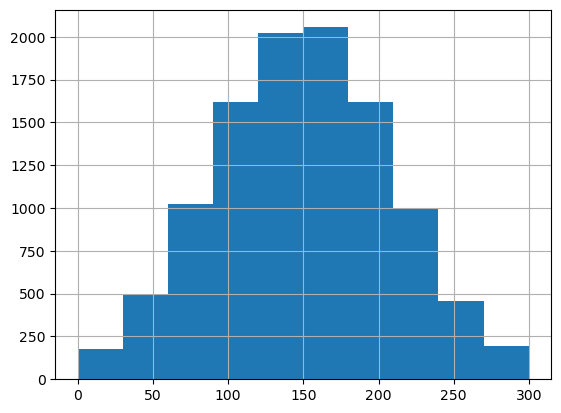

In [68]:
session['session_duration'].hist()

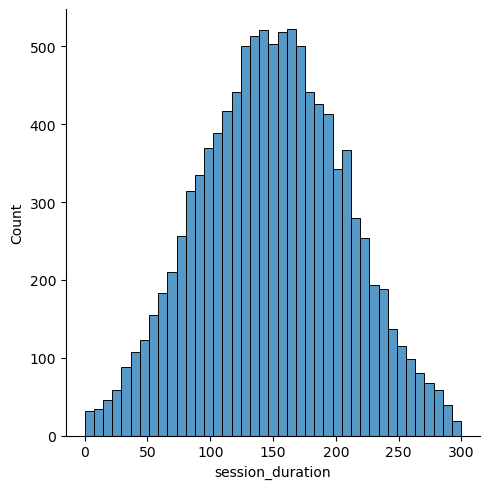

In [69]:
sns.displot(session.session_duration)

In [70]:
shapiro_test_session_duration = shapiro(session.session_duration)
print('p-value: ', shapiro_test_session_duration.pvalue)
if shapiro_test_session_duration.pvalue > 0.05:
    print('session_duration likely belongs to a normal distribution')
else:
    print('session_duration likely belongs to a distribution different to normal')

p-value:  6.463948977854586e-14
session_duration likely belongs to a distribution different to normal


C:\Users\42194\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Assuggested by the warning, this appears to be a wrong conclusion (the graph looks like it is coming from a normal distribution). We will perfrom more statistical tests:

In [71]:
stats.anderson(session.session_duration, dist='norm')

AndersonResult(statistic=2.9670734335777524, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=149.58938895423, scale=57.638010996252845)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

stats.kstest este treba spravit

Session.session_duration seems to belong to a normal distribution.

#### session.page_activity_duration

In [72]:
session['page_activity_duration'].describe()

count    10662.000000
mean         8.824277
std          2.050625
min          2.031710
25%          7.443437
50%          9.109535
75%         10.328667
max         14.819500
Name: page_activity_duration, dtype: float64

In [73]:
session['page_activity_duration'].median()

9.109535000000001

In [74]:
stats.mode(session['page_activity_duration'])

C:\Users\42194\AppData\Local\Temp\ipykernel_26388\3498771631.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(session['page_activity_duration'])


ModeResult(mode=array([6.04174]), count=array([2]))

In [75]:
np.var(session['page_activity_duration'])

4.204669785370732

In [76]:
stats.skew(session.page_activity_duration)

-0.3868325054347587

In [77]:
stats.kurtosis(session.page_activity_duration)

-0.3175340690507489

<Axes: >

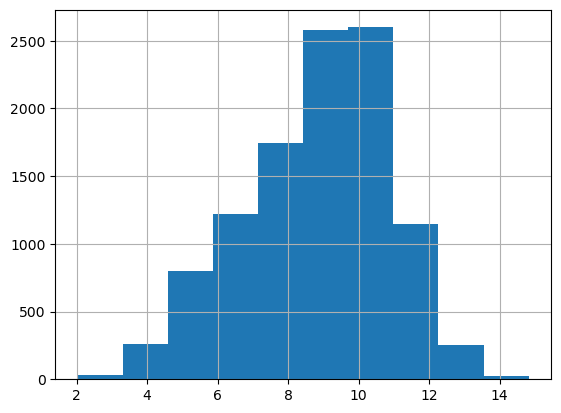

In [78]:
session['page_activity_duration'].hist()

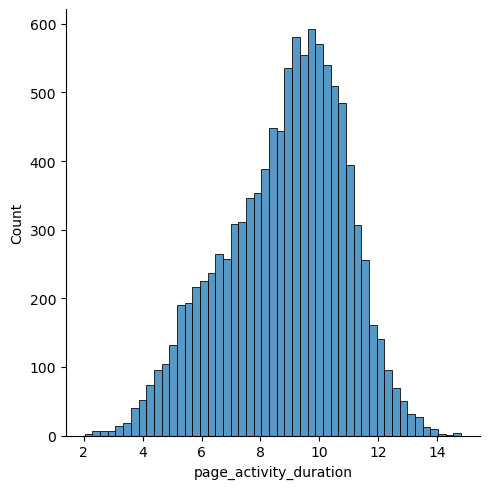

In [79]:
sns.displot(session.page_activity_duration)

In [80]:
shapiro_test_page_activity_duration = shapiro(session.page_activity_duration)
print('p-value: ', shapiro_test_page_activity_duration.pvalue)
if shapiro_test_page_activity_duration.pvalue > 0.05:
    print('page_activity_duration likely belongs to a normal distribution')
else:
    print('page_activity_duration likely belongs to a distribution different to normal')

p-value:  8.975491523807392e-33
page_activity_duration likely belongs to a distribution different to normal


C:\Users\42194\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### session.pct_mouse_click

In [81]:
session['pct_mouse_click'].describe()

count    10662.000000
mean         7.342956
std          1.789575
min          2.821160
25%          6.221007
50%          7.035725
75%          8.150237
max         13.899250
Name: pct_mouse_click, dtype: float64

In [82]:
session['pct_mouse_click'].median()

7.035724999999999

In [83]:
stats.mode(session['pct_mouse_click'])

C:\Users\42194\AppData\Local\Temp\ipykernel_26388\1269360193.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(session['pct_mouse_click'])


ModeResult(mode=array([4.09732]), count=array([2]))

In [84]:
np.var(session['pct_mouse_click'])

3.2022773121160735

In [85]:
stats.skew(session.pct_mouse_click)

0.7629499250755357

In [86]:
stats.kurtosis(session.pct_mouse_click)

0.5036117387076628

<Axes: >

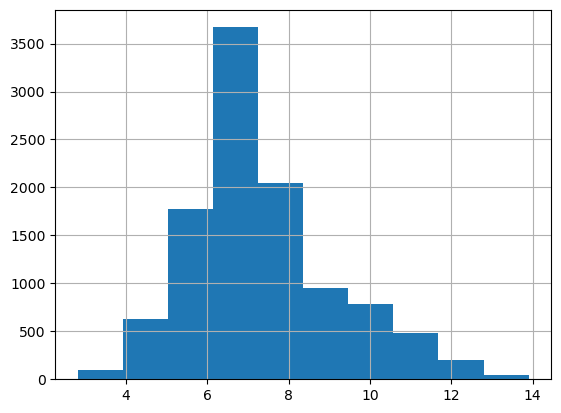

In [87]:
session['pct_mouse_click'].hist()

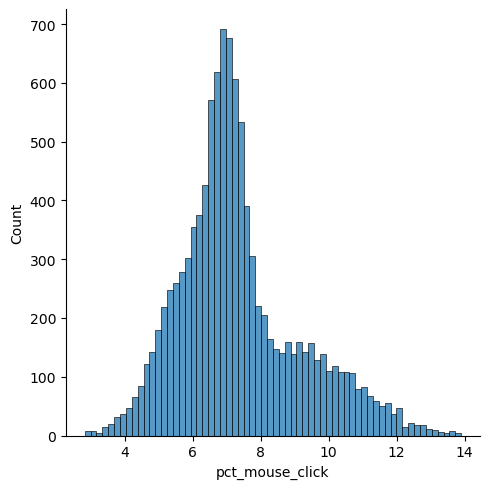

In [88]:
sns.displot(session.pct_mouse_click)

In [89]:
shapiro_test_pct_mouse_click = shapiro(session.pct_mouse_click)
print('p-value: ', shapiro_test_pct_mouse_click.pvalue)
if shapiro_test_pct_mouse_click.pvalue > 0.05:
    print('pct_mouse_click likely belongs to a normal distribution')
else:
    print('pct_mouse_click likely belongs to a distribution different to normal')

p-value:  0.0
pct_mouse_click likely belongs to a distribution different to normal


C:\Users\42194\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### session.mouse_move_total

In [90]:
session['mouse_move_total_rel_distance'].describe()

count    10662.000000
mean         8.060307
std          0.989459
min          5.039260
25%          7.384510
50%          8.054750
75%          8.729755
max         11.356270
Name: mouse_move_total_rel_distance, dtype: float64

In [91]:
session['mouse_move_total_rel_distance'].median()

8.054749999999999

In [92]:
stats.mode(session['mouse_move_total_rel_distance'])

C:\Users\42194\AppData\Local\Temp\ipykernel_26388\2443964857.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(session['mouse_move_total_rel_distance'])


ModeResult(mode=array([8.46091]), count=array([3]))

In [93]:
np.var(session['mouse_move_total_rel_distance'])

0.9789369944728189

In [94]:
stats.skew(session.mouse_move_total_rel_distance)

0.030860506933154713

In [95]:
stats.kurtosis(session.mouse_move_total_rel_distance)

-0.11086024230458635

<Axes: >

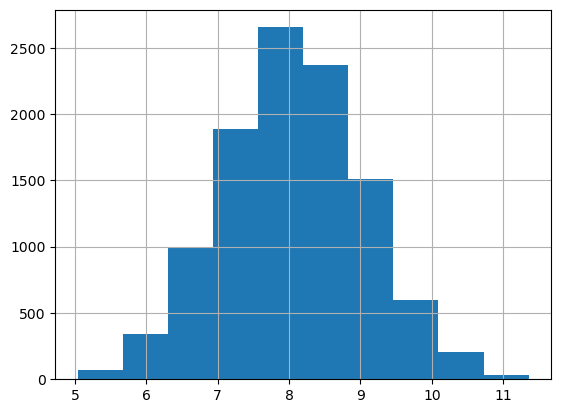

In [96]:
session['mouse_move_total_rel_distance'].hist()

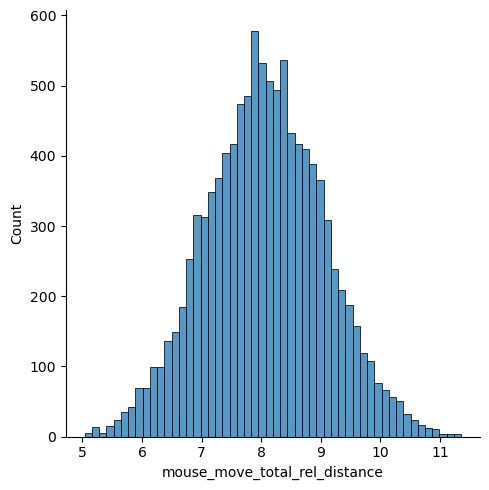

In [97]:
sns.displot(session.mouse_move_total_rel_distance)

In [98]:
shapiro_test_mouse_move_total_rel_distance = shapiro(session.mouse_move_total_rel_distance)
print('p-value: ', shapiro_test_mouse_move_total_rel_distance.pvalue)
if shapiro_test_mouse_move_total_rel_distance.pvalue > 0.05:
    print('mouse_move_total_rel_distance likely belongs to a normal distribution')
else:
    print('mouse_move_total_rel_distance likely belongs to a distribution different to normal')

p-value:  0.0032885950058698654
mouse_move_total_rel_distance likely belongs to a distribution different to normal


C:\Users\42194\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### session.scroll_move_total_rel_distance

In [99]:
session['scroll_move_total_rel_distance'].describe()

count    10662.000000
mean         8.988777
std          1.910360
min          2.119410
25%          7.993113
50%          9.345995
75%         10.292475
max         13.865950
Name: scroll_move_total_rel_distance, dtype: float64

In [100]:
session['scroll_move_total_rel_distance'].median()

9.345994999999998

In [101]:
stats.mode(session['scroll_move_total_rel_distance'])

C:\Users\42194\AppData\Local\Temp\ipykernel_26388\3195112333.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(session['scroll_move_total_rel_distance'])


ModeResult(mode=array([6.00813]), count=array([2]))

In [102]:
np.var(session['scroll_move_total_rel_distance'])

3.649132816440023

In [103]:
stats.skew(session.scroll_move_total_rel_distance)

-0.7449409332365828

In [104]:
stats.kurtosis(session.scroll_move_total_rel_distance)

0.298883299236016

<Axes: >

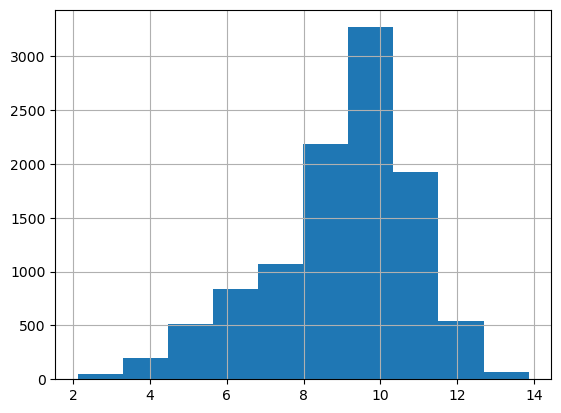

In [105]:
session['scroll_move_total_rel_distance'].hist()

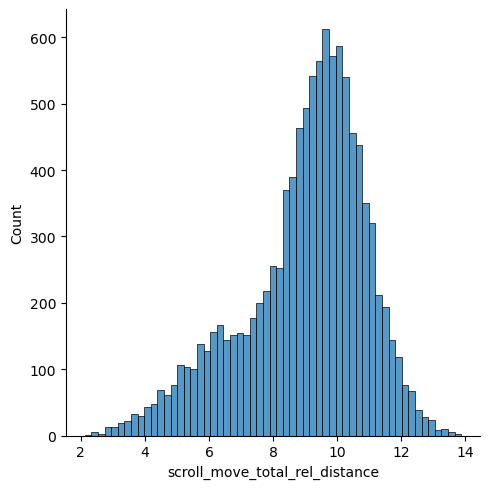

In [106]:
sns.displot(session.scroll_move_total_rel_distance)

In [107]:
shapiro_test_scroll_move_total_rel_distance = shapiro(session.scroll_move_total_rel_distance)
print('p-value: ', shapiro_test_scroll_move_total_rel_distance.pvalue)
if shapiro_test_scroll_move_total_rel_distance.pvalue > 0.05:
    print('scroll_move_total_rel_distance likely belongs to a normal distribution')
else:
    print('scroll_move_total_rel_distance likely belongs to a distribution different to normal')

p-value:  0.0
scroll_move_total_rel_distance likely belongs to a distribution different to normal


C:\Users\42194\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### session.screen_resolution

In [108]:
session['screen_resolution'].describe()

KeyError: 'screen_resolution'

In [ ]:
session.groupby('screen_resolution').size()

In [ ]:
fig, ax = plt.subplots(figsize=(17,11))
session.screen_resolution.value_counts().plot(kind='bar', ax=ax)

#### user.age

In [ ]:
user['age'].describe()

In [ ]:
user.groupby('age').size()

In [ ]:
fig, ax = plt.subplots(figsize=(25,11))
user.age.value_counts().plot(kind='bar', ax=ax)

#### user.sex

In [ ]:
user['sex'].describe()

In [ ]:
user.groupby('sex').size()

In [ ]:
user.sex.value_counts().plot(kind='bar')

#### product.code

In [ ]:
product['code'].describe()

In [ ]:
product.groupby('code').size()

In [ ]:
fig, ax = plt.subplots(figsize=(30,11))
product.code.value_counts().plot(kind='bar', ax=ax)

#### session.browser_name

In [ ]:
session['browser_name'].describe()

In [ ]:
session.groupby('browser_name').size()

In [ ]:
session.browser_name.value_counts().plot(kind='bar')

# PAIR ANALYSIS: IDENTIFING THE CORRELATION BETWEEN ATTRIBUTES

In this faze of the project, we decided to leave the age, sex and location/address of the users out of the analysis due to issue with the user dataset. The issues include:
* multiple users with the same user_id
* unstructured values in address/place of residence columns

<Axes: >

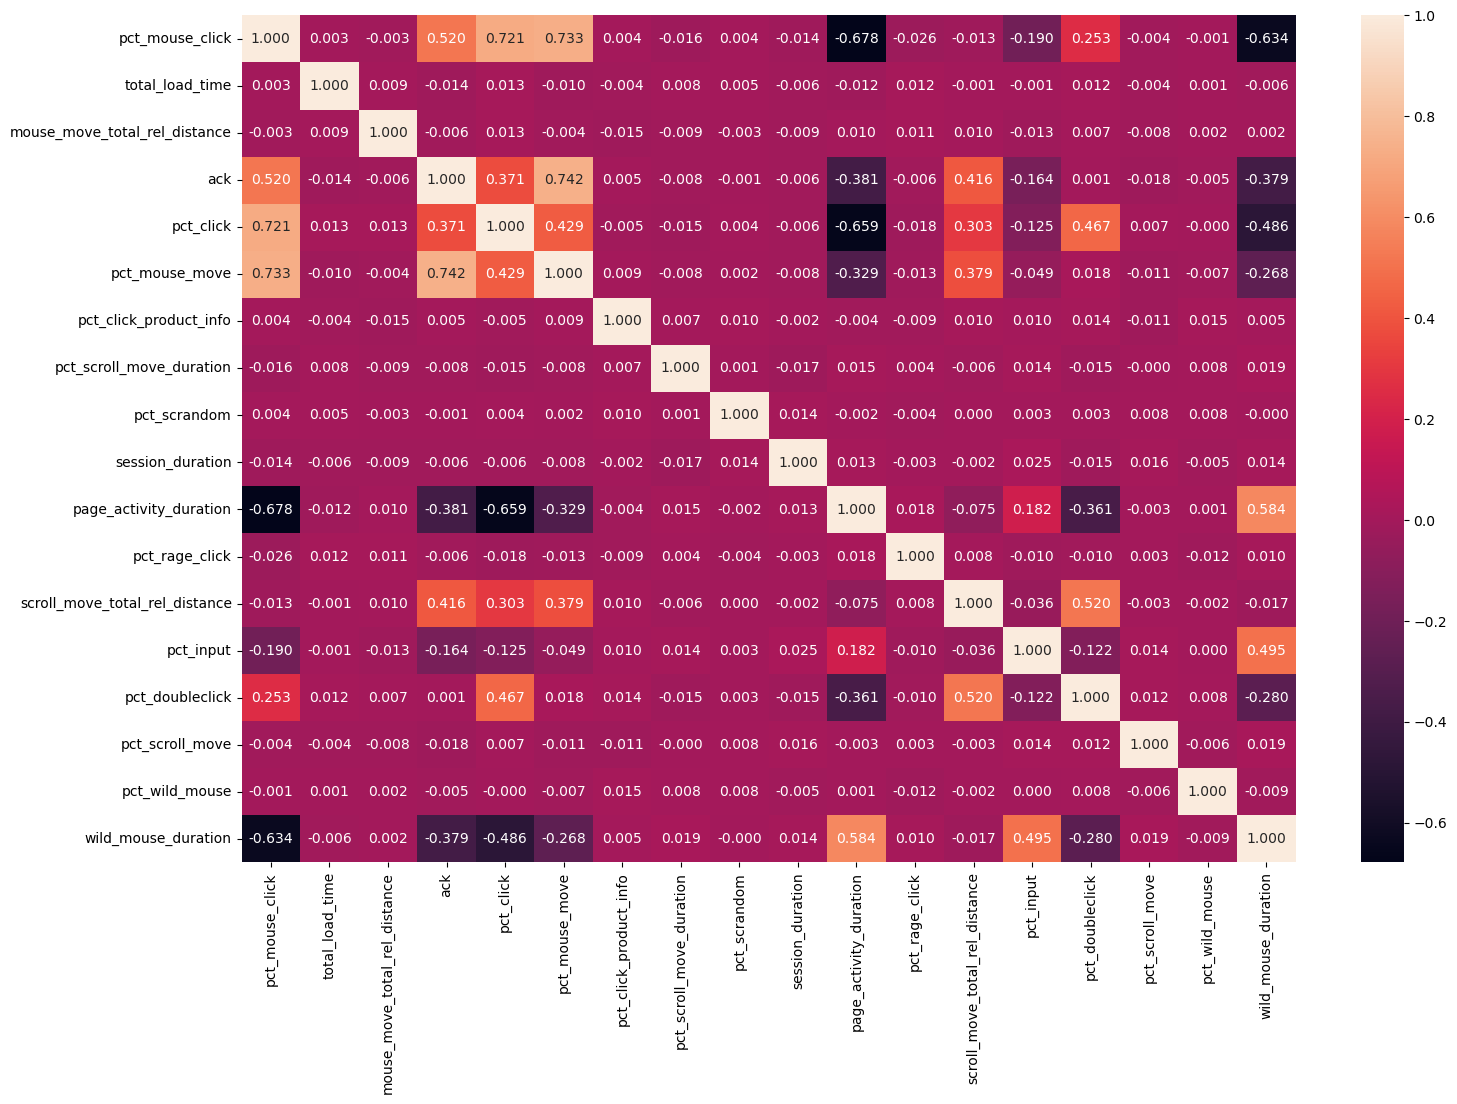

In [129]:
fig, ax = plt.subplots(figsize=(17,11))
sns.heatmap(session.select_dtypes(exclude=['int64','object']).corr(), ax=ax, annot=True, fmt=".3f")

In this section, we are not going to analyse relationships regarding the 'ack' variable. Some of the highest/lowest correlations are between the following pairs of (non-ack) attributes:

* pct_mouse_click - pct_click
* pct_mouse_click - pct_mouse_move
* pct_mouse_click - wild_mouse_duration
* pct_click - page_activity_duration
* page_activity_duration - wild_mouse_duration

#### pct_mouse_click - pct_click

In [130]:
pearsonr(session.pct_mouse_click, session.pct_click)

PearsonRResult(statistic=0.7205238294667061, pvalue=0.0)

In [131]:
cov(session.pct_mouse_click, session.pct_click)[0, 1]

2.8243579925325033

In [ ]:
sns.regplot(data=session, x="pct_mouse_click", y="pct_click")

In [ ]:
sns.scatterplot(data=session, x='pct_mouse_click', y='pct_click')

In [ ]:
sns.histplot(session.pct_mouse_click, bins=10, color="blue")
sns.histplot(session.pct_click, bins=10, color="green")

#### pct_mouse_click - pct_mouse_move

In [ ]:
# pearsonr(session.pct_mouse_click, session.pct_mouse_move)

In [ ]:
# cov(session.pct_mouse_click, session.pct_mouse_move)[0, 1]

<Axes: xlabel='pct_mouse_click', ylabel='pct_mouse_move'>

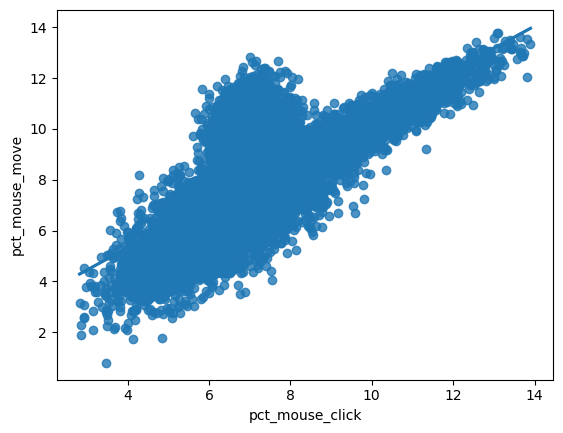

In [109]:
sns.regplot(data=session, x="pct_mouse_click", y="pct_mouse_move")

<Axes: xlabel='pct_mouse_click', ylabel='pct_mouse_move'>

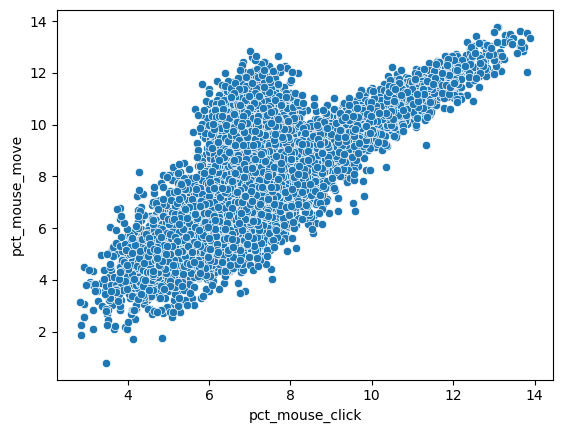

In [110]:
sns.scatterplot(data=session, x='pct_mouse_click', y='pct_mouse_move')

<Axes: xlabel='pct_mouse_click', ylabel='Count'>

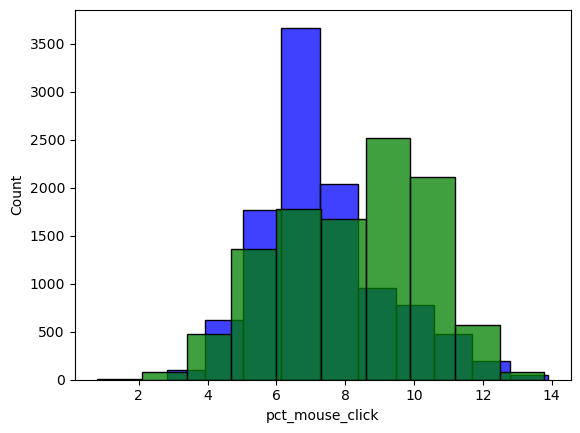

In [111]:
sns.histplot(session.pct_mouse_click, bins=10, color="blue")
sns.histplot(session.pct_mouse_move, bins=10, color="green")

#### pct_mouse_click - wild_mouse_duration

In [112]:
# pearsonr(session.pct_mouse_click, session.wild_mouse_duration)

In [113]:
# cov(session.pct_mouse_click, session.wild_mouse_duration)[0, 1]

<Axes: xlabel='pct_mouse_click', ylabel='wild_mouse_duration'>

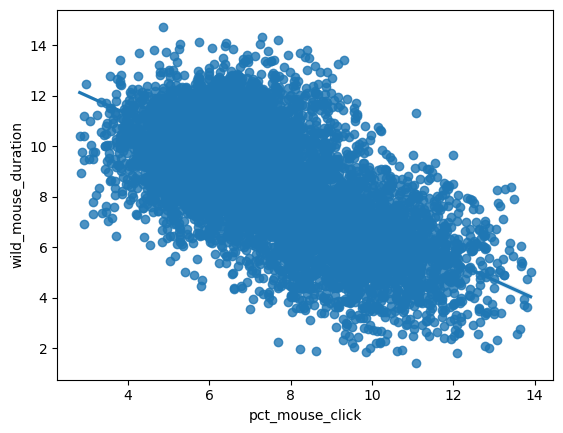

In [114]:
sns.regplot(data=session, x="pct_mouse_click", y="wild_mouse_duration")

<Axes: xlabel='pct_mouse_click', ylabel='wild_mouse_duration'>

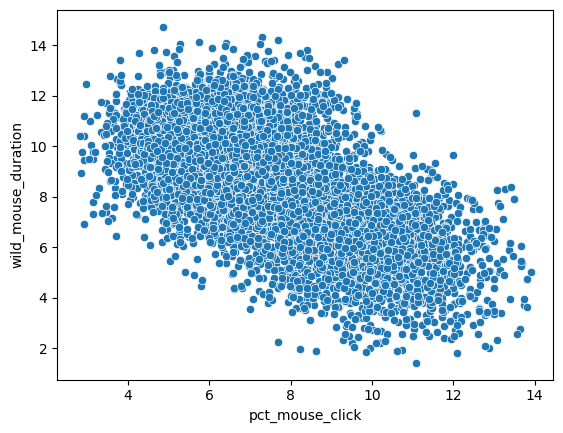

In [115]:
sns.scatterplot(data=session, x='pct_mouse_click', y='wild_mouse_duration')

<Axes: xlabel='pct_mouse_click', ylabel='Count'>

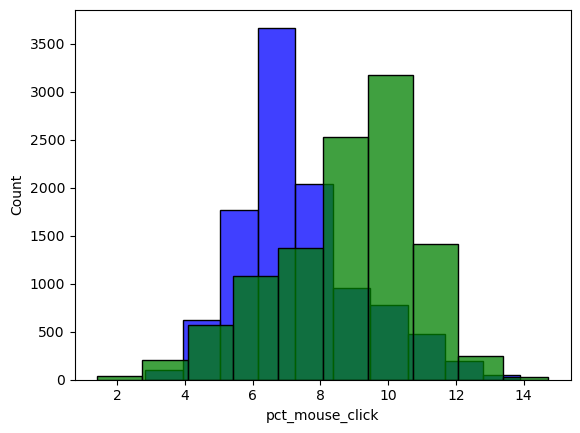

In [116]:
sns.histplot(session.pct_mouse_click, bins=10, color="blue")
sns.histplot(session.wild_mouse_duration, bins=10, color="green")

#### pct_click - page_activity_duration

In [117]:
pearsonr(session.page_activity_duration, session.pct_click)

PearsonRResult(statistic=-0.6590997699022274, pvalue=0.0)

In [118]:
cov(session.page_activity_duration, session.pct_click)[0, 1]

-2.960458876947346

<Axes: xlabel='page_activity_duration', ylabel='pct_click'>

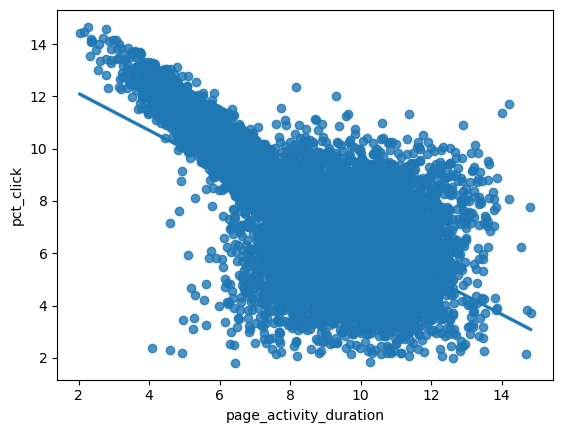

In [119]:
sns.regplot(data=session, x="page_activity_duration", y="pct_click")

<Axes: xlabel='page_activity_duration', ylabel='pct_click'>

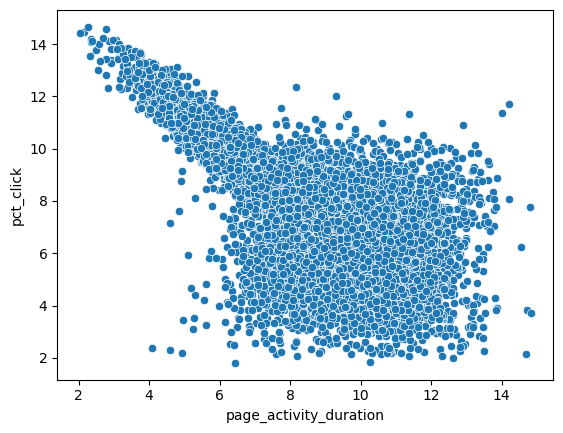

In [120]:
sns.scatterplot(data=session, x='page_activity_duration', y='pct_click')

<Axes: xlabel='page_activity_duration', ylabel='Count'>

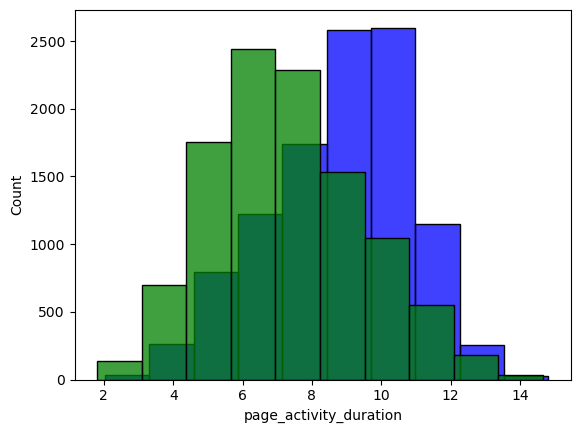

In [121]:
sns.histplot(session.page_activity_duration, bins=10, color="blue")
sns.histplot(session.pct_click, bins=10, color="green")

#### page_activity_duration - wild_mouse_duration

In [122]:
# pearsonr(session.page_activity_duration, session.wild_mouse_duration)

In [123]:
# cov(session.page_activity_duration, session.wild_mouse_duration)[0, 1]

<Axes: xlabel='page_activity_duration', ylabel='wild_mouse_duration'>

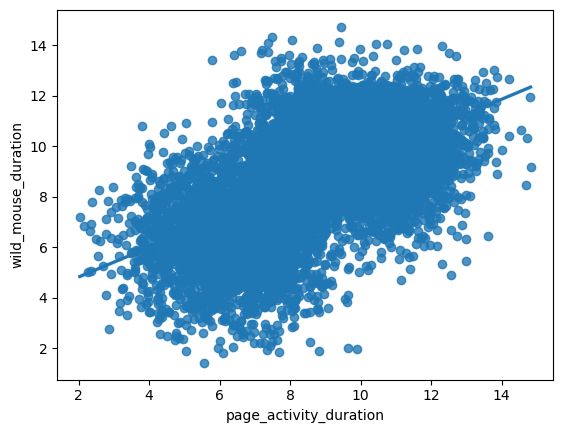

In [124]:
sns.regplot(data=session, x="page_activity_duration", y="wild_mouse_duration")

<Axes: xlabel='page_activity_duration', ylabel='wild_mouse_duration'>

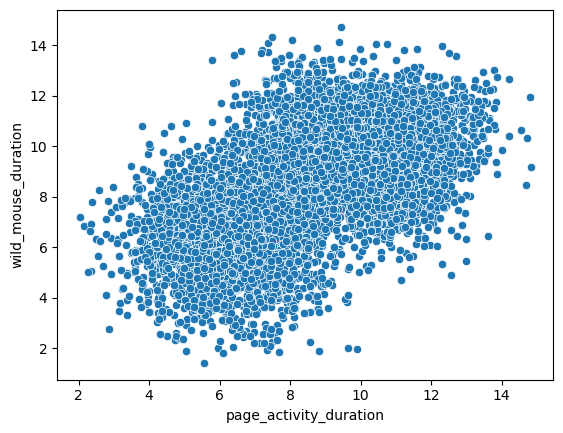

In [125]:
sns.scatterplot(data=session, x='page_activity_duration', y='wild_mouse_duration')

<Axes: xlabel='page_activity_duration', ylabel='Count'>

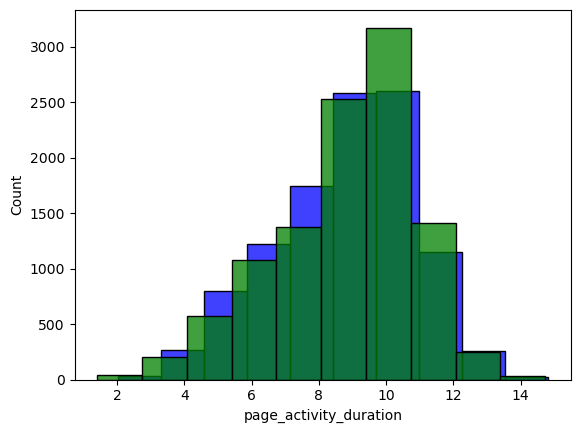

In [126]:
sns.histplot(session.page_activity_duration, bins=10, color="blue")
sns.histplot(session.wild_mouse_duration, bins=10, color="green")

### Relationships including non-numeric columns

Outside of the heatmap, we are also going to analyse the relationships between these pairs of attributes:
* pct_mouse_move - screen_resolution
* pct_rage_click - browser_name

ValueError: Could not interpret input 'screen_resolution'

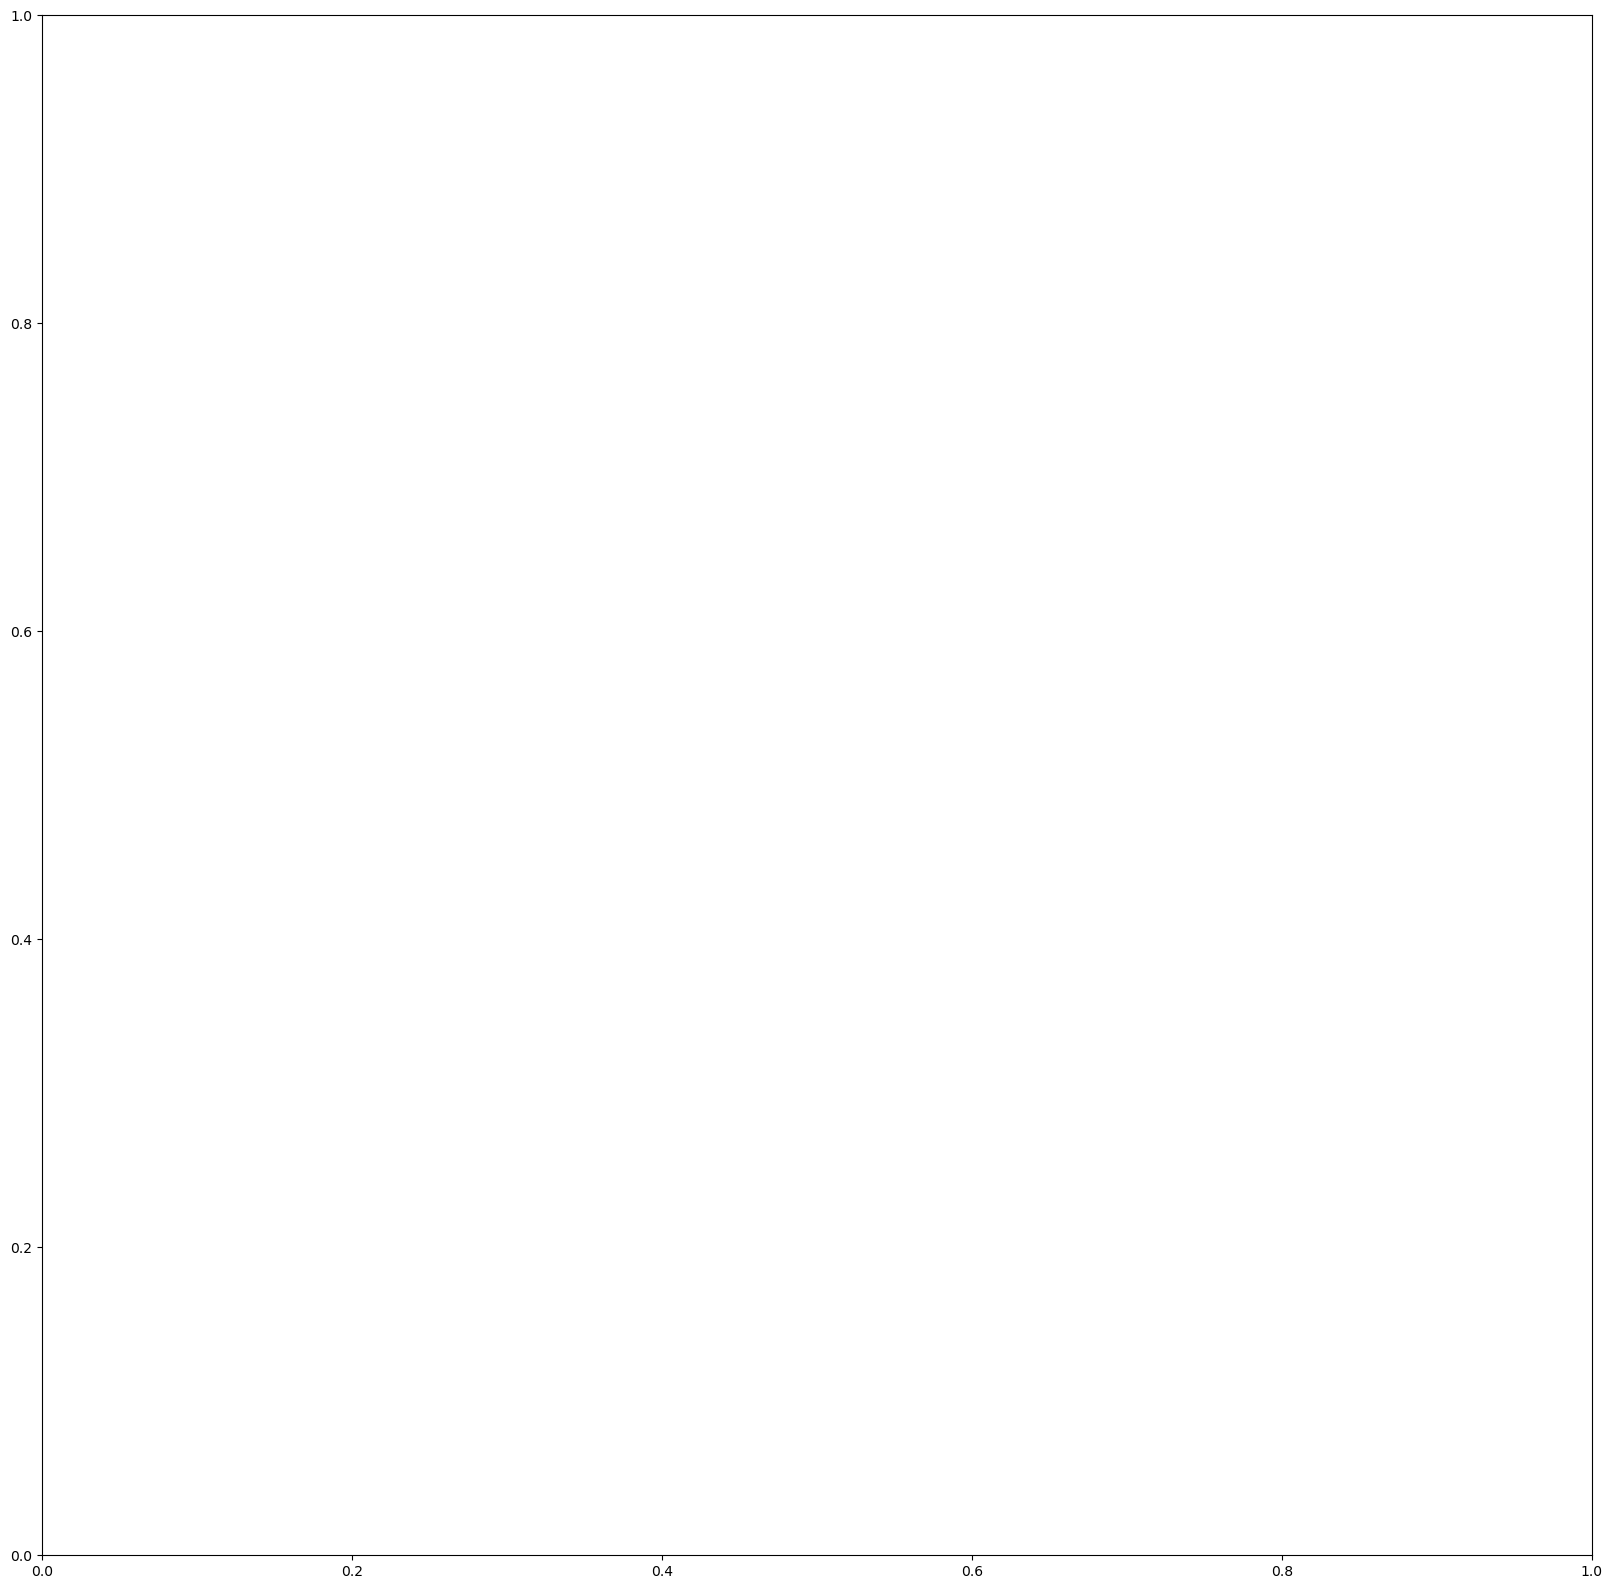

In [127]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=session, x="pct_mouse_move", y="screen_resolution", ax=ax)

In [ ]:
sns.boxplot(data=session, x="pct_rage_click", y="browser_name")

# Realtionships between 'ack' and the other attributes

In [ ]:
sns.pairplot(session.loc[:, ~session.columns.isin(["session_id","product_ean","user_id"])], hue='ack')

In the heatmap in the previous section, we can see that the following attributes have notably high/low correlations with 'ack':

* wild_mouse_duration
* scroll_move_total_rel_distance
* page_activity_duration
* pct_mouse_move
* pct_mouse_click

Additionally, we will take a look at how the screen_resolution and browser_name affect the 'ack' variable.

In [ ]:
sns.boxplot(data=session, x="wild_mouse_duration", y=session['ack'].astype(str))

In [ ]:
sns.boxplot(data=session, x="scroll_move_total_rel_distance", y=session['ack'].astype(str))

In [ ]:
sns.boxplot(data=session, x="page_activity_duration", y=session['ack'].astype(str))

In [ ]:
sns.boxplot(data=session, x="pct_mouse_move", y=session['ack'].astype(str))

In [ ]:
sns.boxplot(data=session, x="pct_mouse_click", y=session['ack'].astype(str))

## Conclusions

There are numerous attribute pairs in the dataset that appear to affect each other. Some of them are:
* pct_mouse_click - pct_click
* pct_mouse_click - pct_mouse_move
* pct_mouse_click - wild_mouse_duration
* pct_click - page_activity_duration
* page_activity_duration - wild_mouse_duration

The **ack** attribute seems to be singnificantly affected by the following attributes:
* wild_mouse_duration
* scroll_move_total_rel_distance
* page_activity_duration
* pct_mouse_move
* pct_mouse_click
* pct_click

The flaws in the data stopped us from combining data from different files in this faze of the project; there are multiple rows with the same user_id in the user file, which would negatively affect our charts and conclusions. On top of that, there is no intersect between the product_ean in the product.csv file and the product_ean in the session.csv file, making it impossible to make any use of the product.csv file for now.

# HYPOTESIS STAGE

## FIRST HYPOTESE: LONGER ON THE PAGE - LESS LIKELY TO MAKE A PURCHASE?

### HYPOTESE PRUFING: (2 WAYS)

**ack ~ page_activity_duration**

**$H_0$** (null hypothesis): **The longer a person stays on the site, more likely they are to buy something.**

**$H_1$ = $H_A$** (alternative hypothesis): **The longer a person stays on the site, less likely they are to buy something.**

Null Hypothesis (H0): The longer the user actively browses the page, the more likely they are to make a purchase. <br>
Alternative Hypothesis (H1 or HA): The longer the user actively browses the page, the less likely they are to make a purchase.

Select a Significance Level (α):

The significance level, often denoted as α, represents the probability of making a Type I error (rejecting a true null hypothesis).

α = 0.05

We can already see from the boxplot visualisation (sns.heatmap(session.select_dtypes(exclude=['int64','object']).corr(), ax=ax, annot=True, fmt=".3f")) that there is a relationship between page_activity_duration and the ack value. (correlation)

As it was in lesson 5 from 5th week:

We have several ways to test this type of relationship:

* we can look to see if there is a correlation between the two attributes
* we can try to *fit* a (e.g. linear) regression model
* we can test for differences between group means by number of cylinders.

So that we can use first point, which provide us the way of analysing in dependancies with correlation. And we will analyse it in Pearson Correlation (Pearson's r). 

**Let's get new dataset for analysing:**

In [140]:
ack_page_act_dur = session[['ack', 'page_activity_duration']]
ack_page_act_dur = ack_page_act_dur.dropna()
ack_page_act_dur

,ack,page_activity_duration
0,0.0,9.81613
1,0.0,8.43727
2,1.0,6.60643
3,1.0,8.13167
4,0.0,12.15022
...,...,...
10786,1.0,8.35908
10787,1.0,6.96837
10789,1.0,4.36895
10790,1.0,10.00149


### PEARSON CORRELATION COEFFICIENT AND P-VALUE

0.0


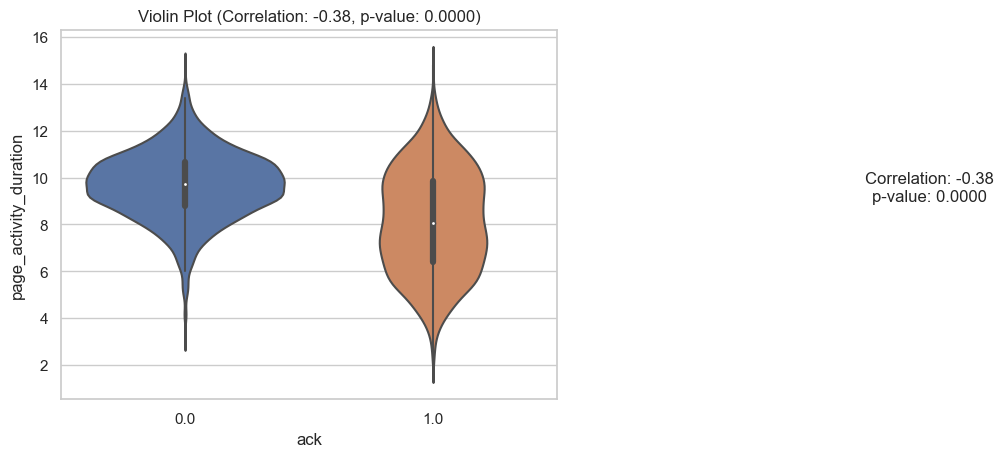

In [143]:
corr, p_value = pearsonr(ack_page_act_dur['ack'], ack_page_act_dur['page_activity_duration'])
sns.set(style="whitegrid")
sns.violinplot(x='ack', y='page_activity_duration', data=ack_page_act_dur)
plt.title(f"Violin Plot (Correlation: {corr:.2f}, p-value: {p_value:.4f})")
plt.text(3, 9, f"Correlation: {corr:.2f}\np-value: {p_value:.4f}", fontsize=12, ha='center')
plt.show()

Here's what this correlation value means:

- A correlation coefficient (r) ranges from -1 to 1.
- A positive value (closer to 1) indicates a positive correlation, meaning that as one variable increases, the other tends to increase as well.
- **A negative value (closer to -1) indicates a negative correlation, meaning that as one variable increases, the other tends to decrease.**
- A correlation coefficient of 0 suggests no linear relationship between the variables.

A p-value close to 0 (e.g., 0.001 or 0.0001) suggests strong evidence against the null hypothesis, indicating a significant correlation between the variables. In this case, it's saying that the observed correlation is very unlikely to be due to random chance.

### MANN-WHITNEY U TEST

In [146]:
# Створіть окрему таблицю для значень, де 'column_1' = 1.
ack_page_act_dur_ones = ack_page_act_dur[ack_page_act_dur['ack'] == 1]

# Створіть окрему таблицю для значень, де 'column_2' = 0.
ack_page_act_dur_zeros = ack_page_act_dur[ack_page_act_dur['ack'] == 0]

ack_page_act_dur_ones

,ack,page_activity_duration
2,1.0,6.60643
3,1.0,8.13167
8,1.0,5.76606
9,1.0,5.77089
12,1.0,9.62778
...,...,...
10786,1.0,8.35908
10787,1.0,6.96837
10789,1.0,4.36895
10790,1.0,10.00149


Mann-Whitney U Test with a Continuous Variable and a Binary Categorical Variable: In this scenario, you would compare the distribution of the continuous variable between the two categories of the binary categorical variable. For example, you might want to compare the scores of two groups (0 and 1) on a continuous scale.

- Null Hypothesis (H0): **The longer a person stays on the site, more likely they are to buy something.**

- Alternative Hypothesis (H1): **The longer a person stays on the site, less likely they are to buy something.**

Data Preparation: You would typically have two datasets or subsets: one for the 0 category and one for the 1 category. Each dataset contains the values of the continuous variable for the respective category.

Ranking: Rank all the data values from both datasets combined.

Calculate U Statistic: Calculate the U statistic based on the ranks and the group membership (0 or 1).

In [147]:
from scipy.stats import mannwhitneyu

# Assuming 'your_continuous_variable' is the name of the continuous variable you want to compare.
# Perform the Mann-Whitney U test.
u_statistic, p_value = mannwhitneyu(ack_page_act_dur_ones['page_activity_duration'], ack_page_act_dur_zeros['page_activity_duration'], alternative='two-sided')

# Print the results.
print(f'U Statistic: {u_statistic}')
print(f'p-value: {p_value}')

# Set your significance level (alpha) for the test.
alpha = 0.05

# Compare the p-value to the significance level to make a decision.
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference between the two groups.')


U Statistic: 8062418.0
p-value: 0.0
Reject the null hypothesis. There is a significant difference between the two groups.


Large U Statistic: A large U statistic suggests that the values in one group tend to be higher than the values in the other group, indicating a significant difference between the two groups.

### PRACTICAL CONTEXT OF HYPOTESE:

Most likely, we can explain this relationship by the fact that people who stay on the site for a long time are only looking at buying, comparing some characteristics, but are not really ready to buy. And only then can they come in and purposefully buy something that they have been looking at for a long time.

(array([   9.,   26.,   83.,  328.,  950., 1558., 1287.,  447.,  105.,
          13.]),
 array([ 3.15532 ,  4.318557,  5.481794,  6.645031,  7.808268,  8.971505,
        10.134742, 11.297979, 12.461216, 13.624453, 14.78769 ]),
 <BarContainer object of 10 artists>)

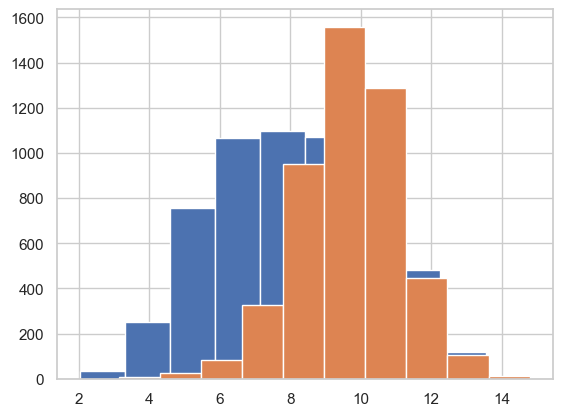

In [151]:
# Create a histogram for the first dataset
plt.hist(ack_page_act_dur_ones['page_activity_duration'], bins=10, alpha=0.5, label='Dataset 1')

# Create a histogram for the second dataset
plt.hist(ack_page_act_dur_zeros['page_activity_duration'], bins=10, alpha=0.5, label='Dataset 2')

In [228]:
pearsonr(session.ack, session.page_activity_duration)

PearsonRResult(statistic=-0.3810022123909228, pvalue=0.0)

## POSSIBLE HYPOTESE: SCREEN SMALLER - MORE PURCHASES?

Skroll move total aleatory distance is a direct indication of how much the user will scroll the page. From the steam analysis graph, you can see that our acknowledgement thaws as the scroll increases.

In [ ]:
SECOND 